In [8]:
%load_ext autoreload

In [9]:
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sodapy import Socrata
import datetime
import numpy as np
import matplotlib.dates as mdates
import data_processing as dp
import data_viz as dv
pd.set_option("display.max_rows", None)
import definitions

In [7]:
dp.get_data()

LOG: Fetched all raw data
LOG: Filtered Data
LOG: Added HHS Provisional data
LOG: Done getting data


In [11]:
def plot_r(data, ax=None, plot_color="black", label="", rolling=True, font={ 'size':13, 'weight':'light'}):
    ax = ax or plt.gca()
    x, y0 = data.date, data.iloc[:,1]
    ax.margins(y=.12)
    if(rolling):
        y1 = data.iloc[:,1].rolling(7).mean()
        ax.plot(x, y0, alpha=.3, color=plot_color)
        ax.plot(x, y1, color=plot_color)
        ax.fill_between(x, y1, 1, facecolor=plot_color, color=plot_color, alpha=0.2)
    else:
        ax.plot(x, y0, color=plot_color)
        ax.fill_between(x, y0, 1, where=(y0>1), color='red', alpha=0.2)
        ax.fill_between(x, y0, 1, where=(y0<1), color='green', alpha=0.2)
    ax.set_title(label, fontdict={'size': 20})
    subtext = []
    for i in [-1,-8]:
        last_update_day = x.iloc[i].strftime('%b-%d')
        last_val = round(y0.iloc[i], 2)
        last_val_formatted = '{:,}'.format(last_val)
        subtext.append(f" {last_update_day}: {last_val_formatted}")
    ax.text(.5, 0.97, subtext[0], ha='center', transform=ax.transAxes, fontdict=font)
    ax.text(.5, 0.94, subtext[1], ha='center',transform=ax.transAxes, fontdict=font)
    if rolling:
        int(round(y1.iloc[-1]))
        avg_formatted = '{:,}'.format(avg)
        subtext.append(f" 7-day Average: {avg_formatted}")
        ax.text(.5, 0.91, subtext[2], ha='center',transform=ax.transAxes, fontdict=font)
    ax.grid(alpha=.4)
    ax.set_ylim(0)
    return ax

In [12]:
def temp_plot(data, **kwargs):
    fig,ax = plt.subplots(dpi=100, figsize=(12,10))
    plot_r(data, rolling=False)
    fig.autofmt_xdate()
    fig.suptitle(f"COVID Data", fontweight="bold", fontsize=23)
    plt.show()

2021-07-31 00:00:00


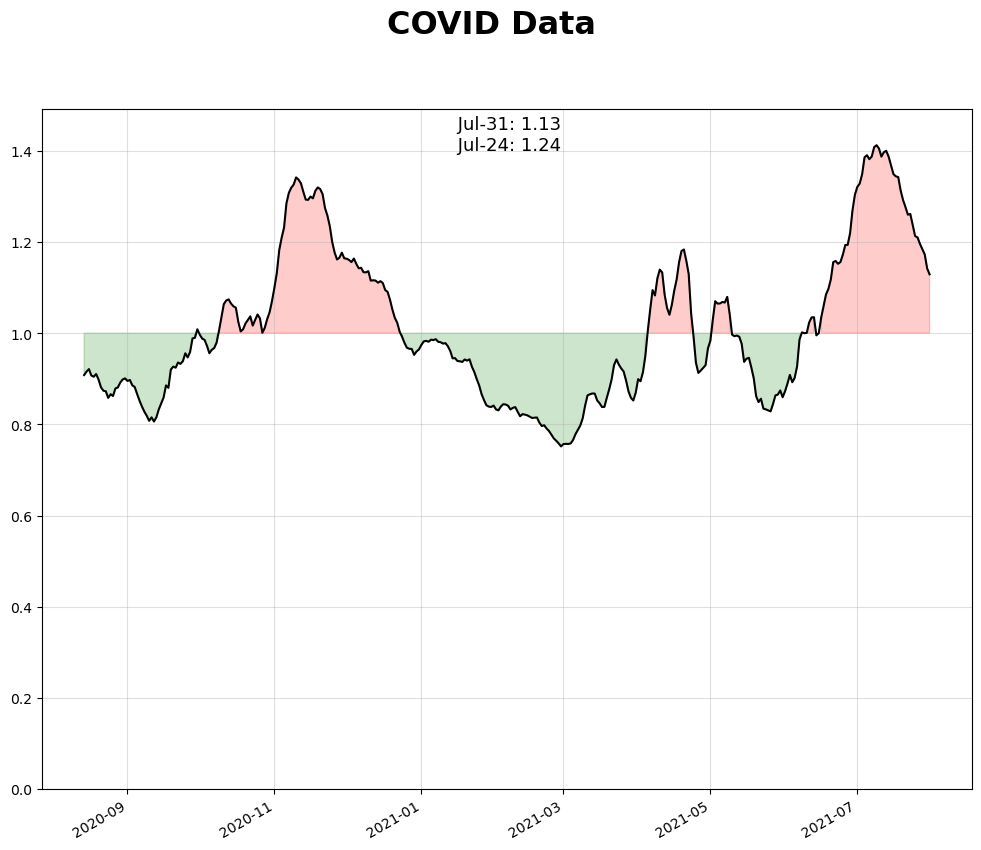

In [17]:
hosps = dp.get_state_hospitalizations(state_codes=["NV"], start_date=pd.Timestamp(2020,8,1), end_date=pd.Timestamp.today()-datetime.timedelta())
# hosps = dp.get_us_hospitalizations(start_date=pd.Timestamp(2020,8,1), end_date=pd.Timestamp.today()-datetime.timedelta())
print(hosps.date.max())
hosps['avg'] = hosps.iloc[:,1].rolling(7).mean()
hosps['pct_chg'] = 1 + hosps.avg.pct_change(periods=7)
# hosps['pct_chg'] = 1 + hosps.iloc[:,1].pct_change(periods=7)
temp_plot(hosps[["date", "pct_chg"]])
# fig, ax = plt.subplots()
# ax.plot(hosps.date, hosps.iloc[:,1])
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b \'%y'))
# ax.grid(alpha=.4)
# ax.axhline(1, linestyle="--", color='black')
# ax.axvline()
# fig.autofmt_xdate()

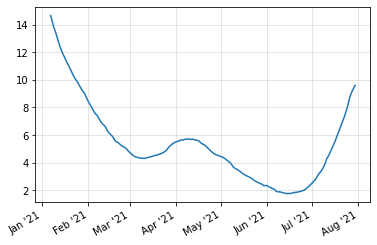

In [61]:
pos = dp.get_us_positivity(start_date=pd.Timestamp(2021,1,1), end_date=pd.Timestamp.today()-datetime.timedelta(4))
pos['day_avg'] = pos.iloc[:,1].rolling(7).mean()
pos['pct_chg'] = 1 + pos.day_avg.pct_change(periods=7)

fig, ax = plt.subplots()
ax.plot(pos.date, pos.day_avg)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b \'%y'))
ax.grid(alpha=.4)
fig.autofmt_xdate()

In [155]:
pos = dp.get_us_positivity(start_date=pd.Timestamp(2021,7,1), end_date=pd.Timestamp.today()-datetime.timedelta())
pos['day_avg'] = pos.iloc[:,1].rolling(7).mean()
pos['pct_chg'] = 1 + pos.day_avg.pct_change(periods=7)
pos

,date,test_positivity,day_avg,pct_chg
0,2021-07-01,2.678242,NaN,NaN
1,2021-07-02,2.863025,NaN,NaN
2,2021-07-03,3.258219,NaN,NaN
3,2021-07-04,3.700851,NaN,NaN
4,2021-07-05,4.135691,NaN,NaN
5,2021-07-06,3.372060,NaN,NaN
6,2021-07-07,3.382404,3.341499,NaN
7,2021-07-08,3.868732,3.511569,NaN
8,2021-07-09,4.265961,3.711988,NaN
9,2021-07-10,4.869997,3.942243,NaN


In [82]:
cases[cases.date > pd.Timestamp(2021,7,23)]
#dp.hhs_data[dp.hhs_data.date > pd.Timestamp(2021,7,24)].sort_values("date", 0)
dp.hhs_data.date.max()

Timestamp('2021-08-02 00:00:00')

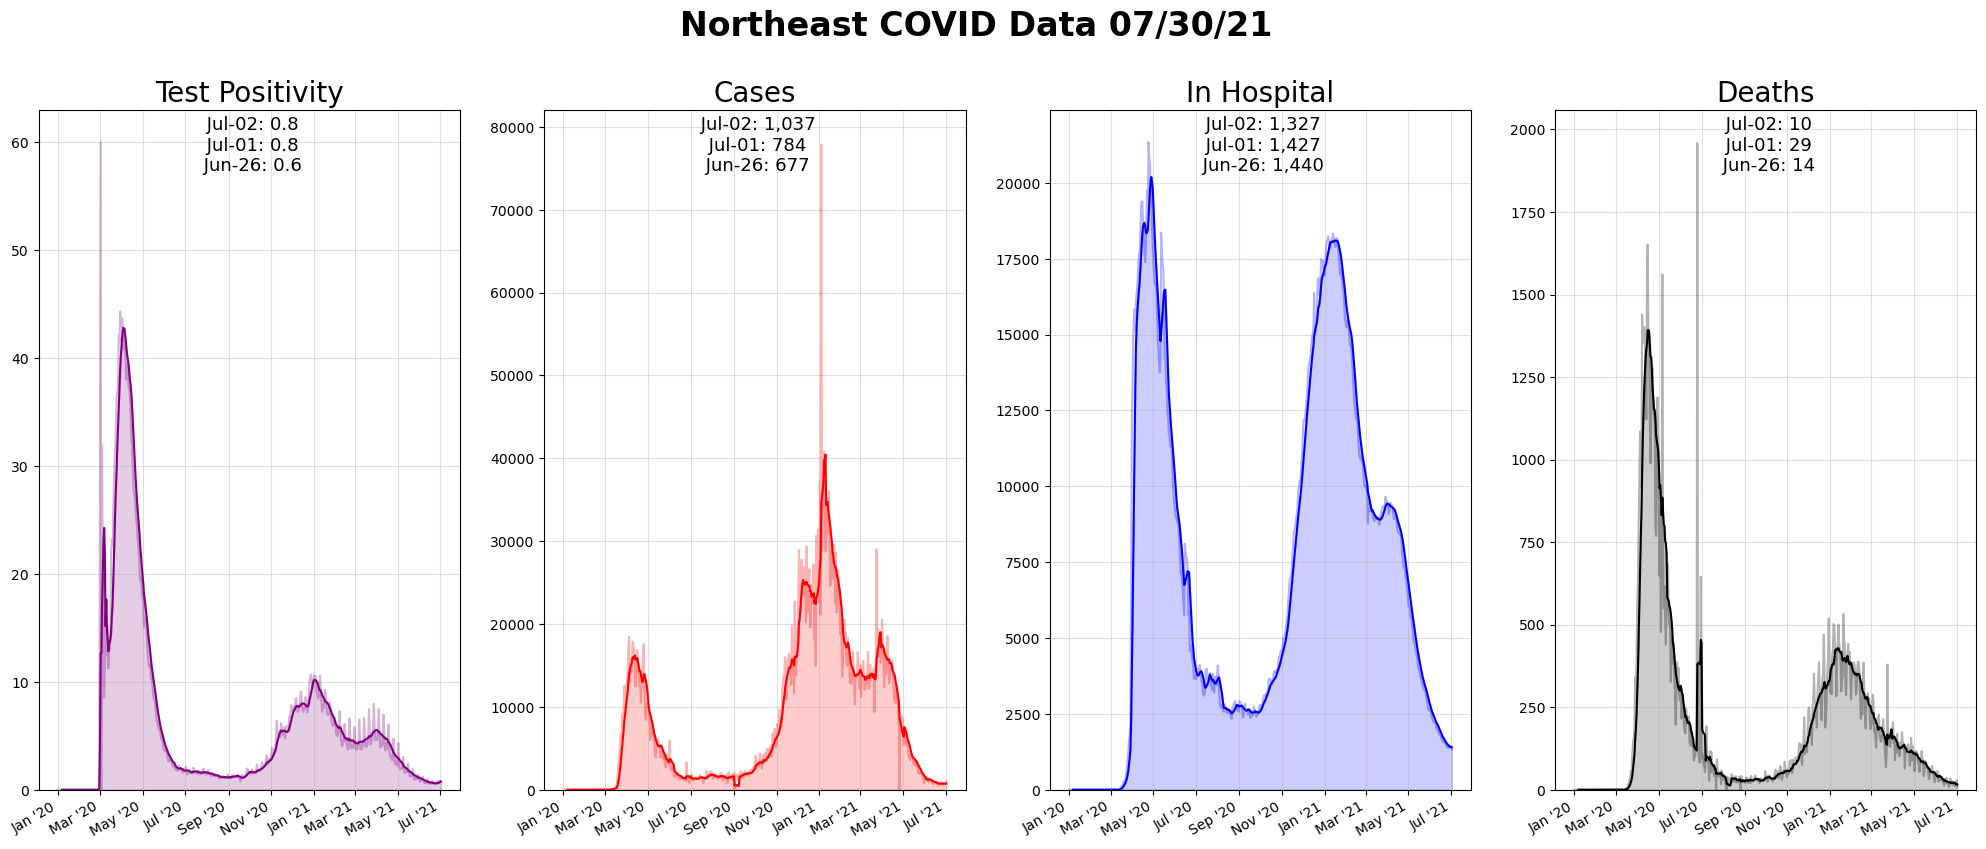

In [6]:
plot_four(region="Northeast", end_date=pd.Timestamp(2021,7,2))

LOG: Plotted tables for USA
LOG: Plotted tables for California
LOG: Plotted tables for Texas
LOG: Plotted tables for Florida
LOG: Plotted tables for Southeast
LOG: Plotted tables for Southwest
LOG: Plotted tables for Pacific Northwest & Rockies
LOG: Plotted tables for Great Plains
LOG: Plotted tables for Great Lakes
LOG: Plotted tables for Mid-Atlantic
LOG: Plotted tables for Northeast


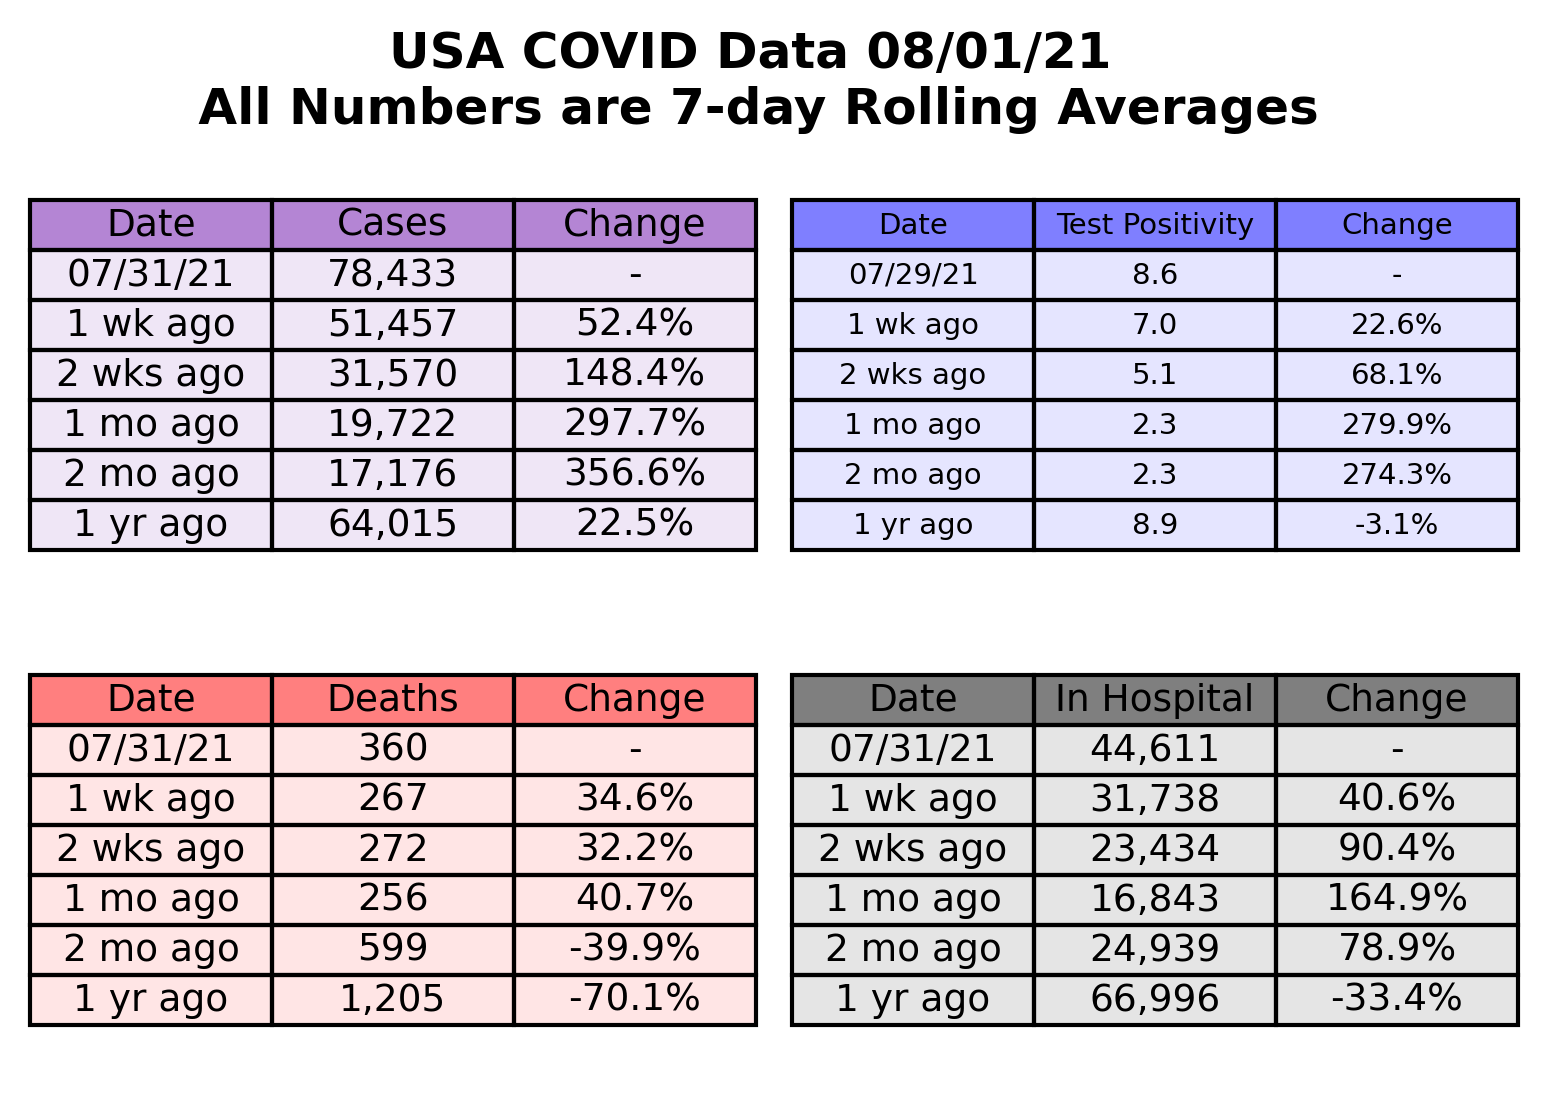

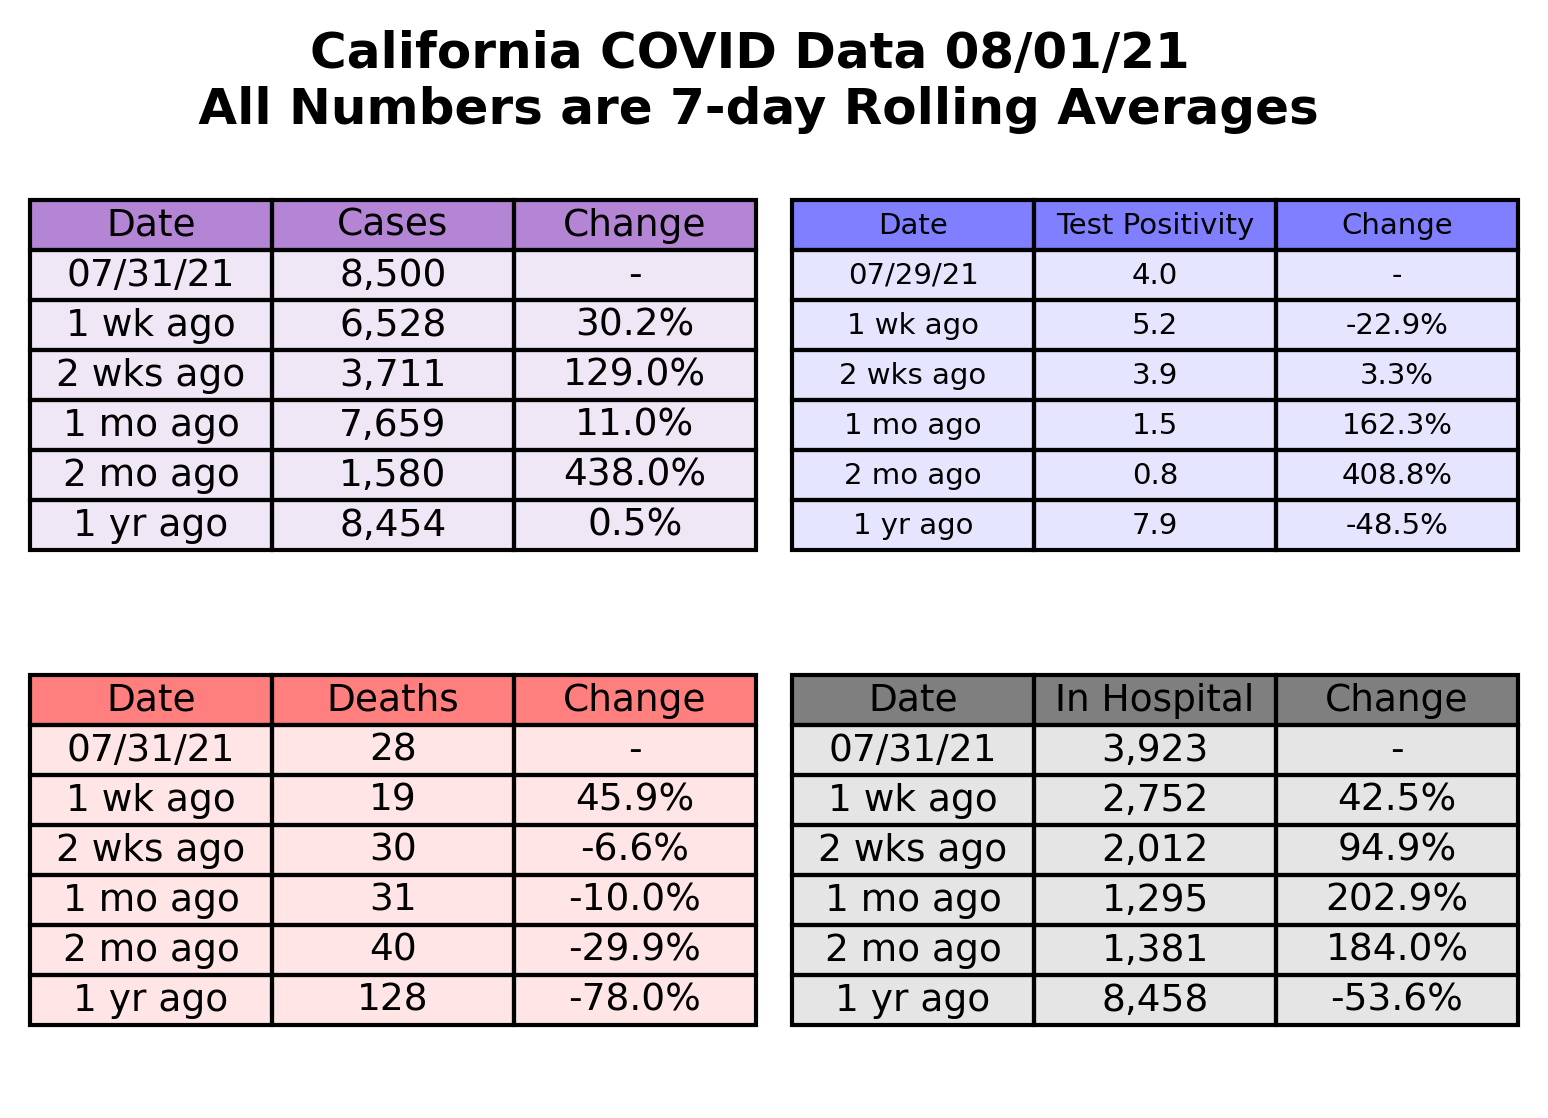

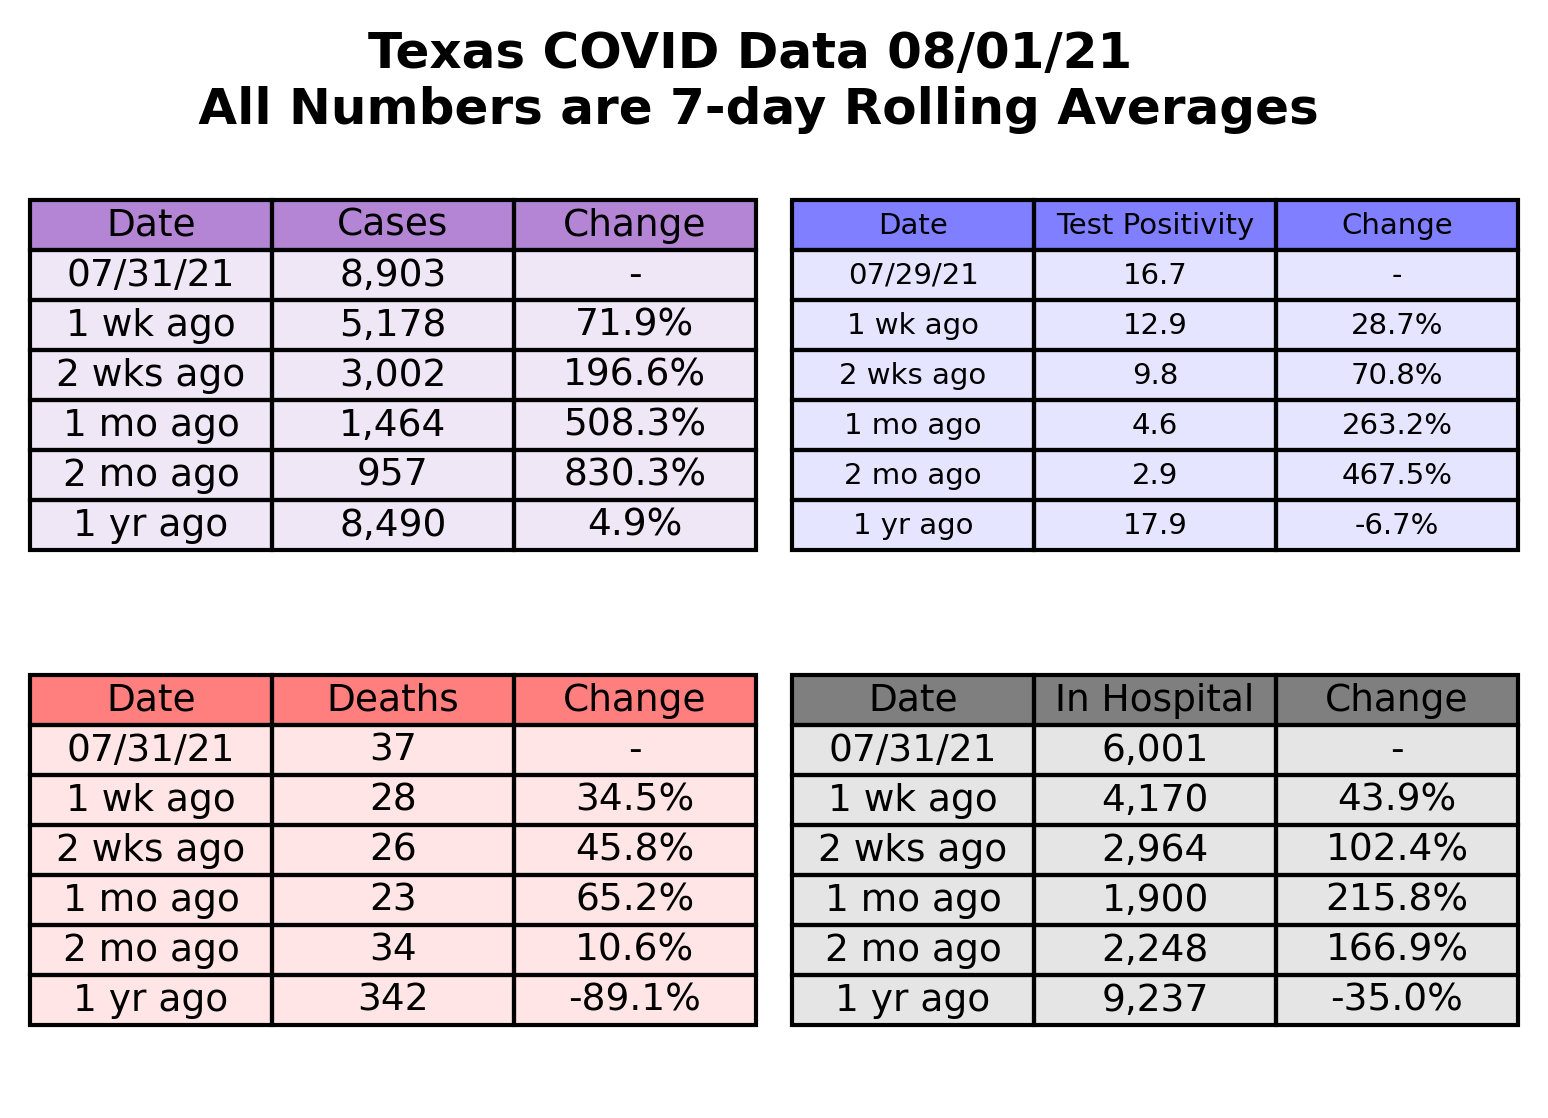

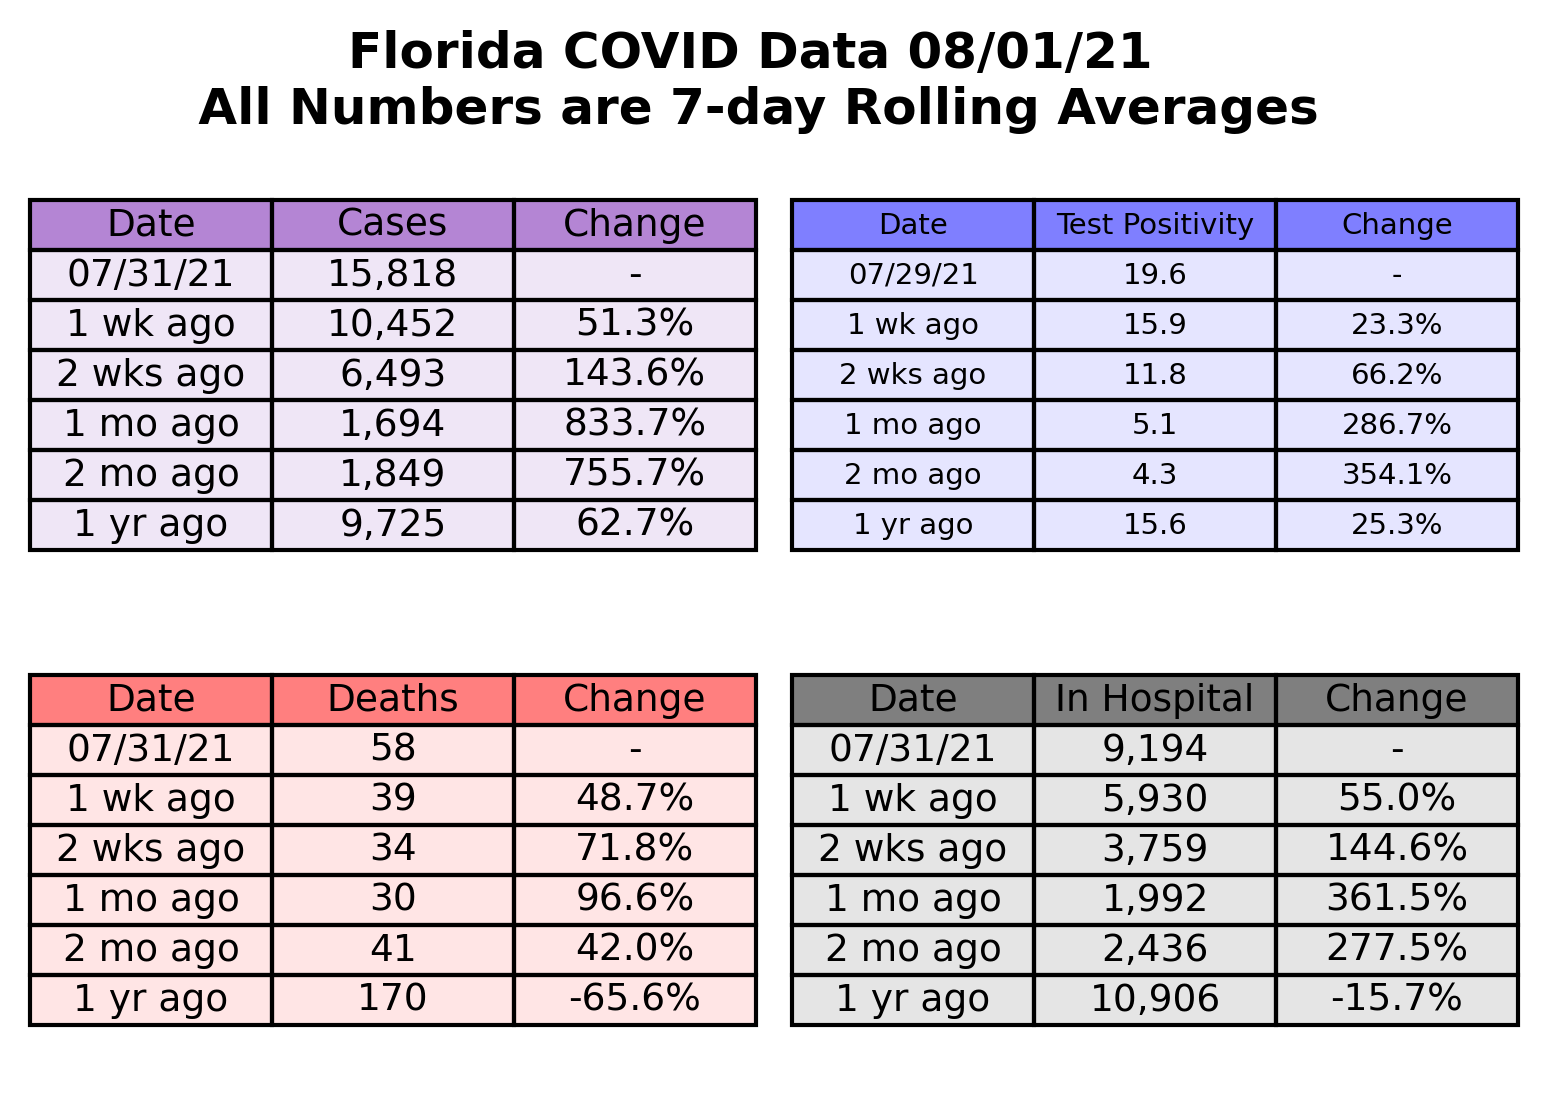

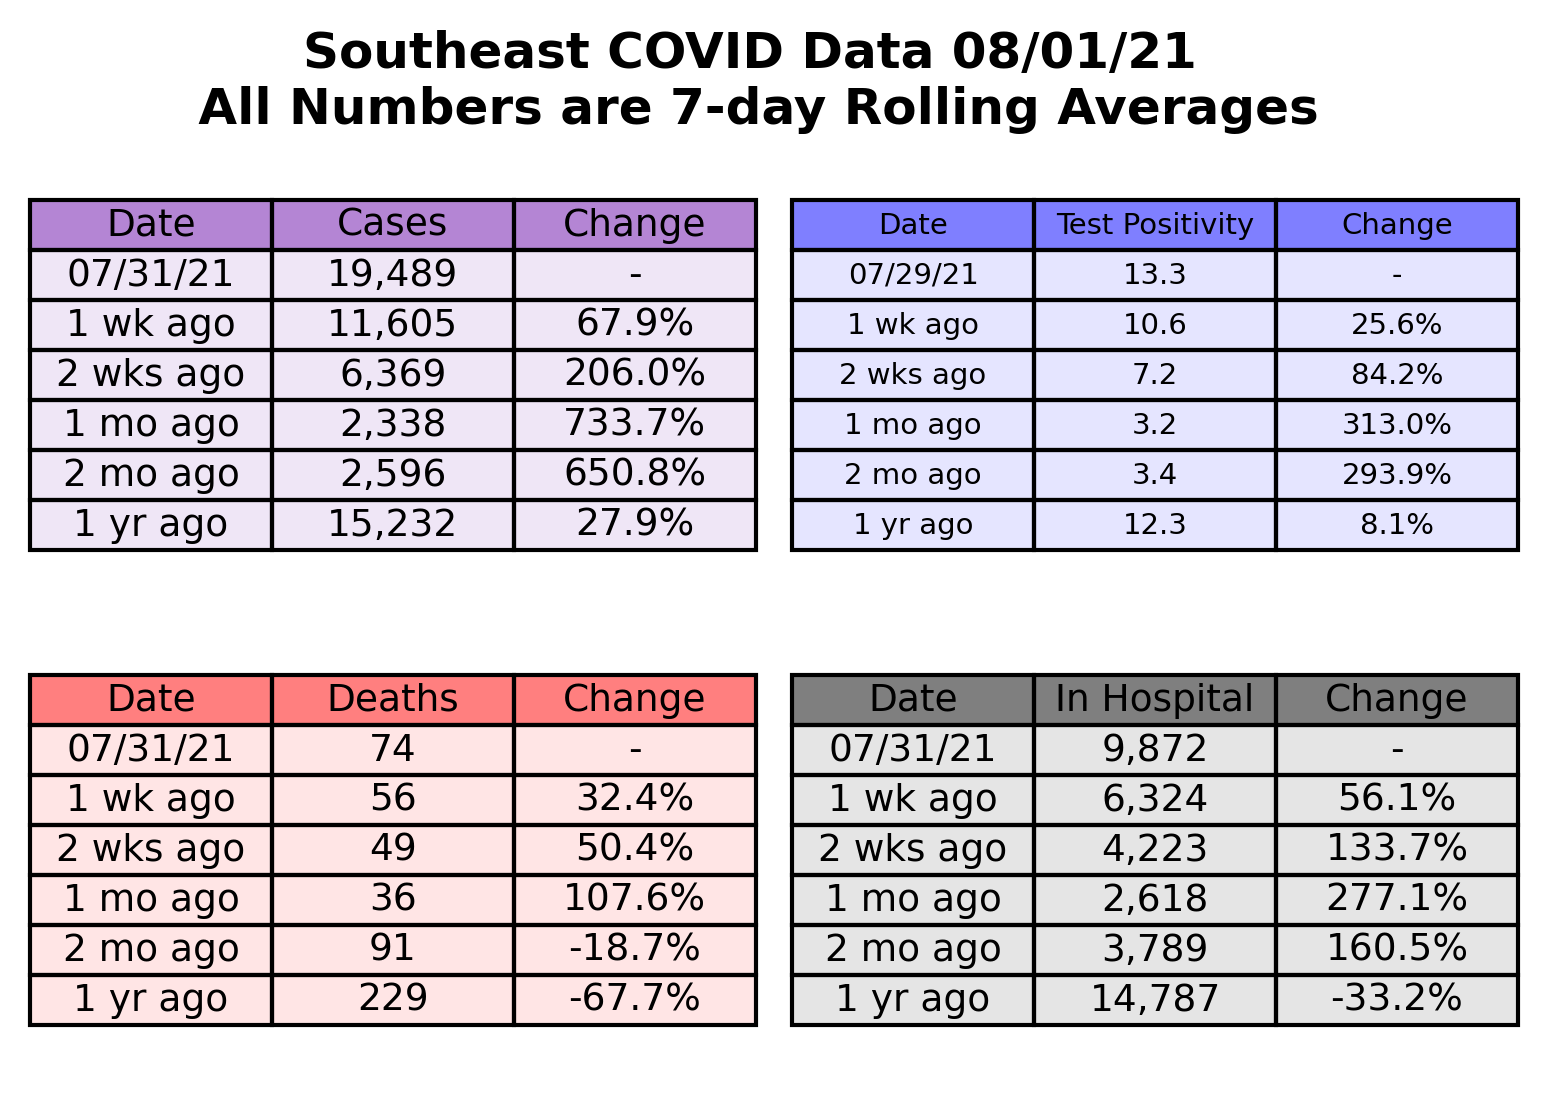

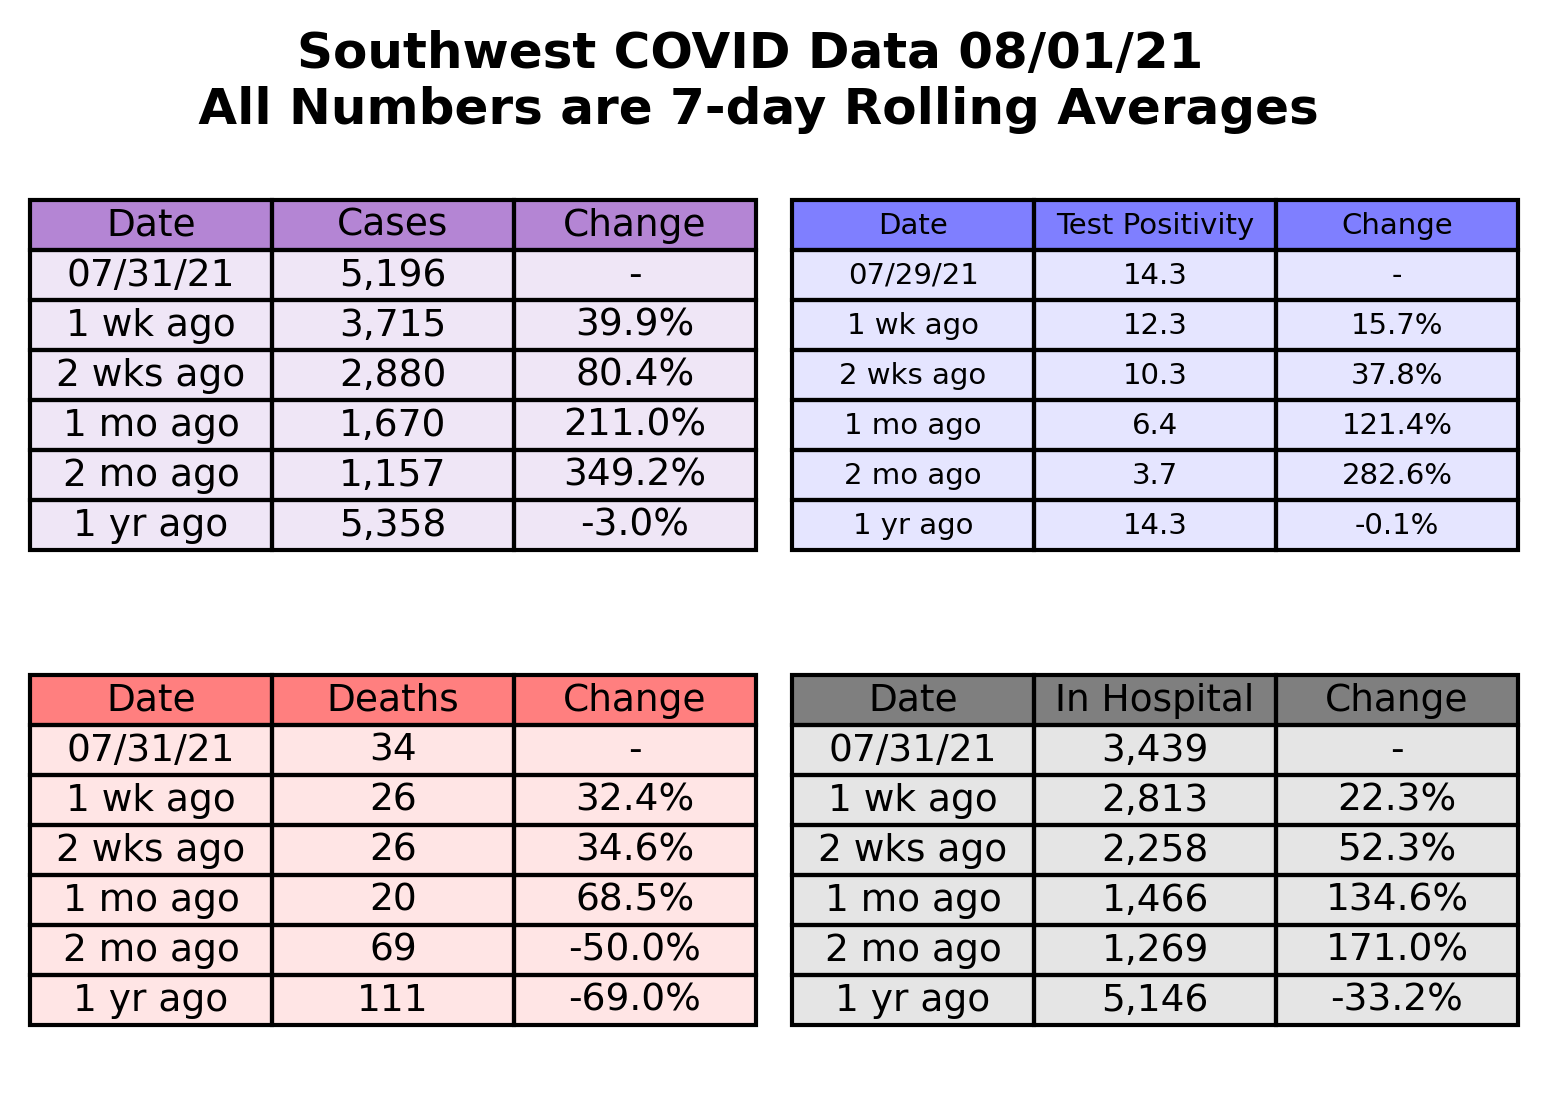

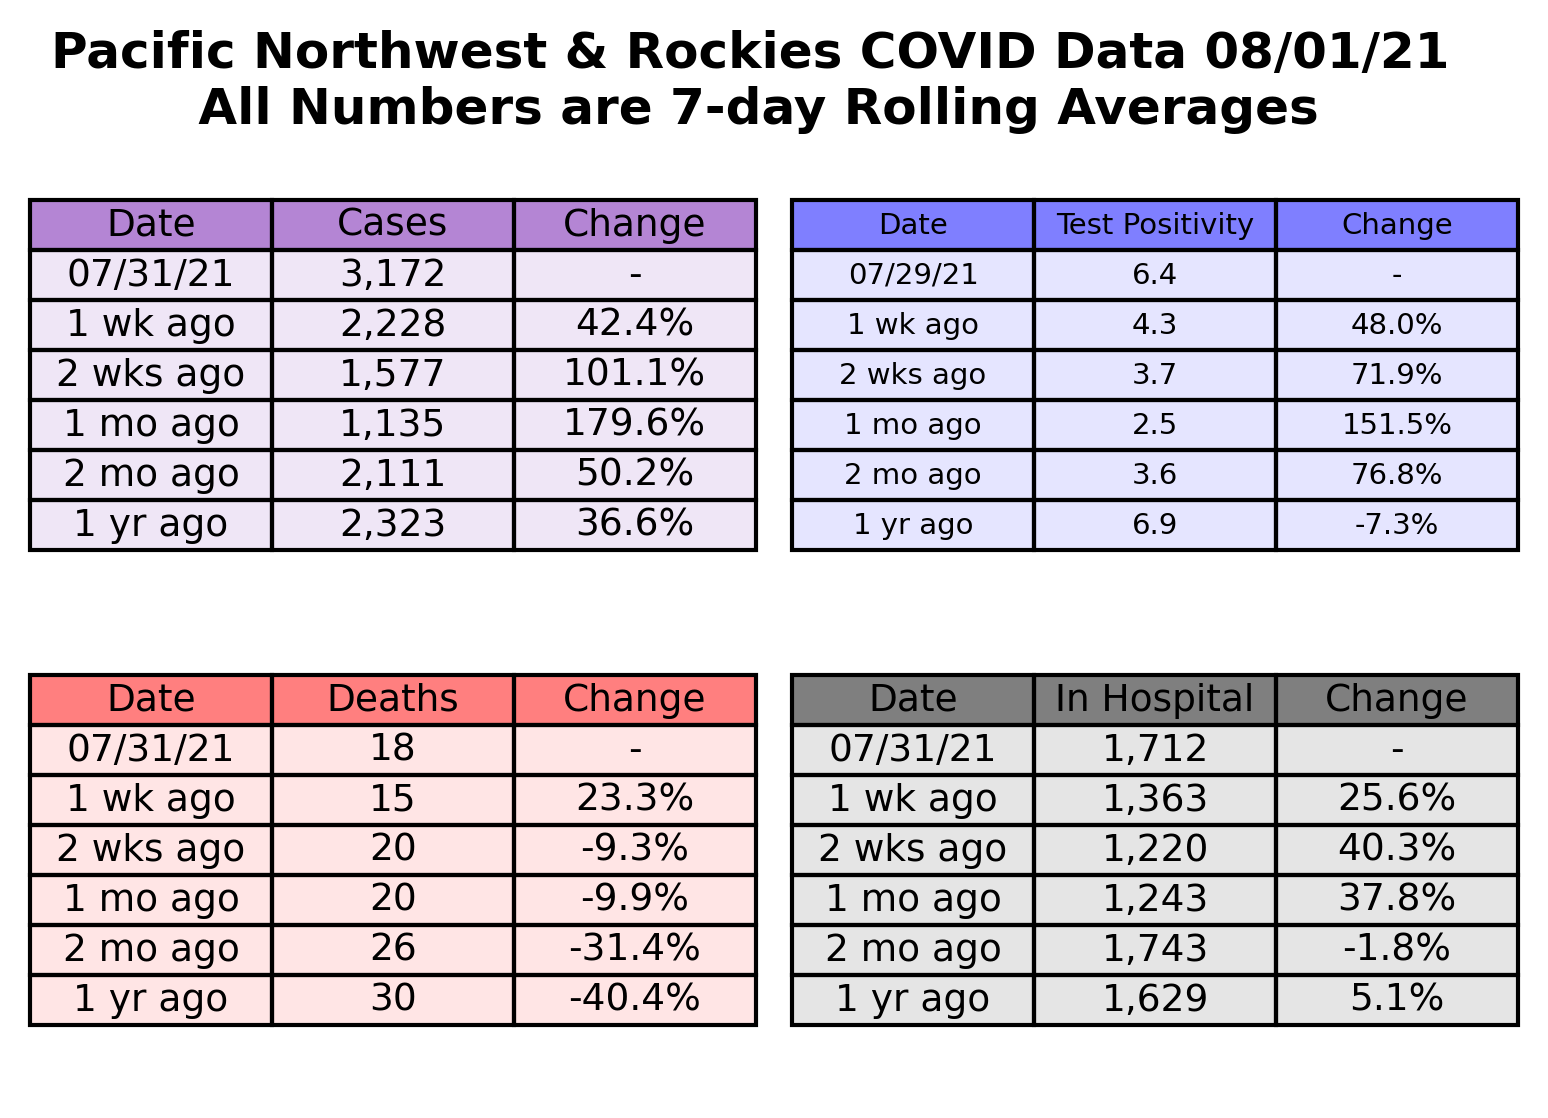

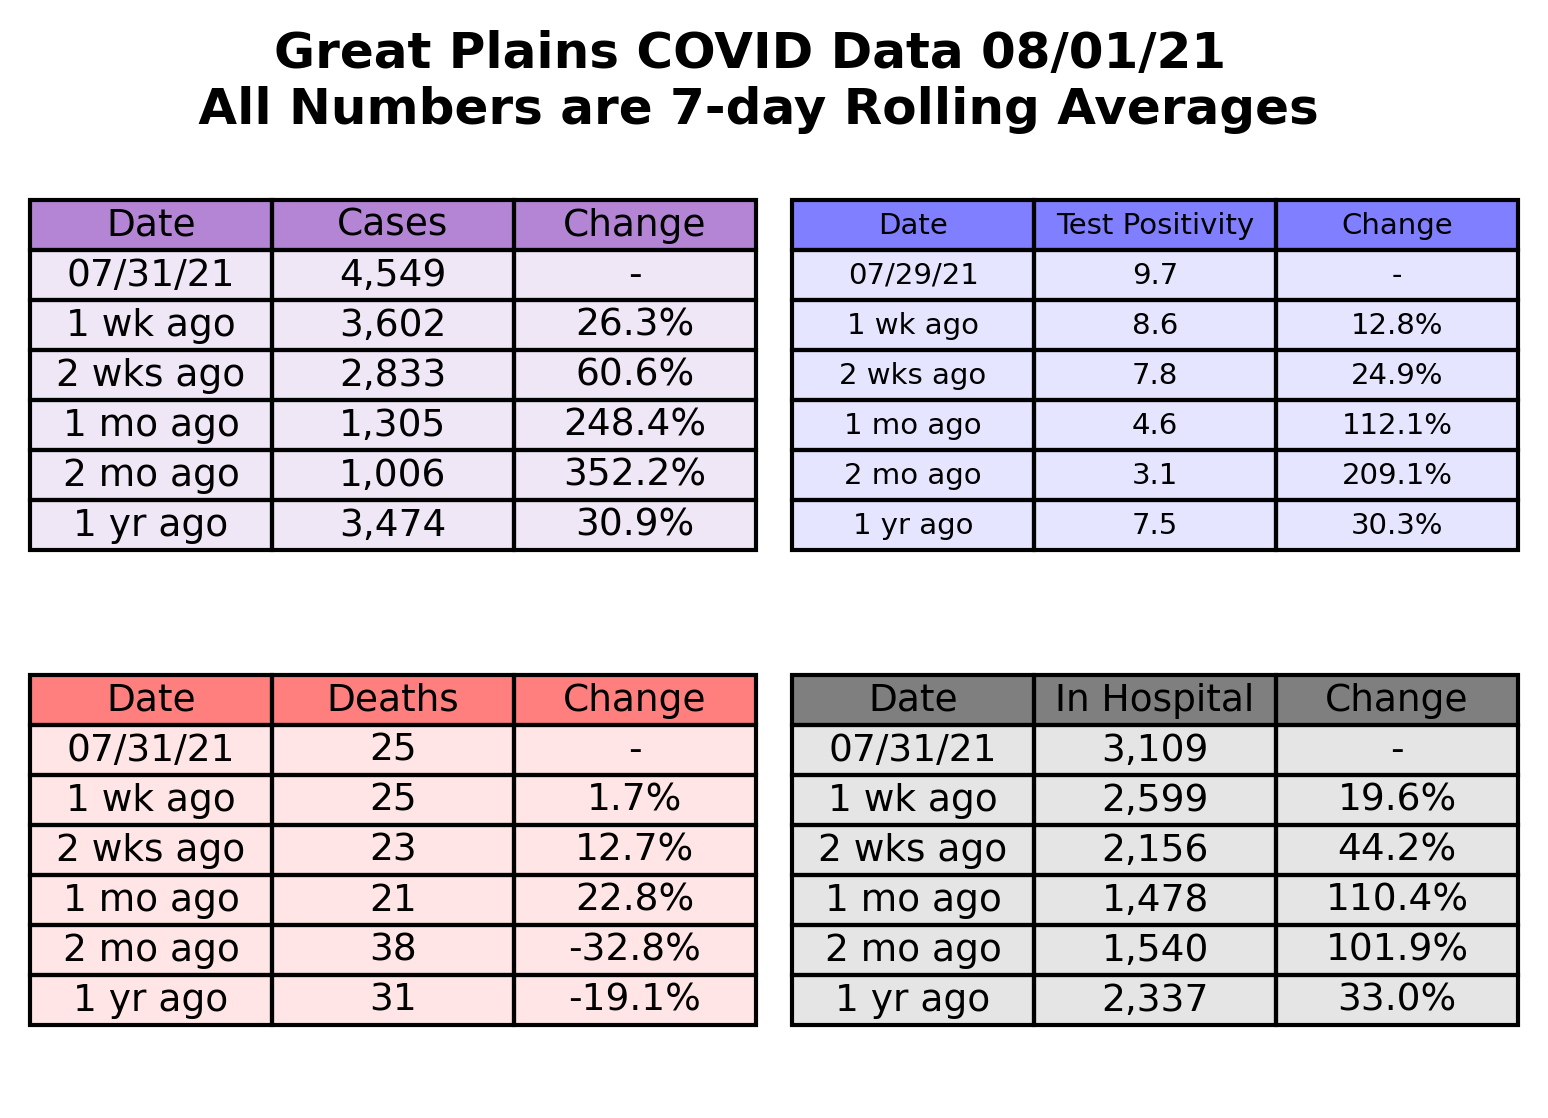

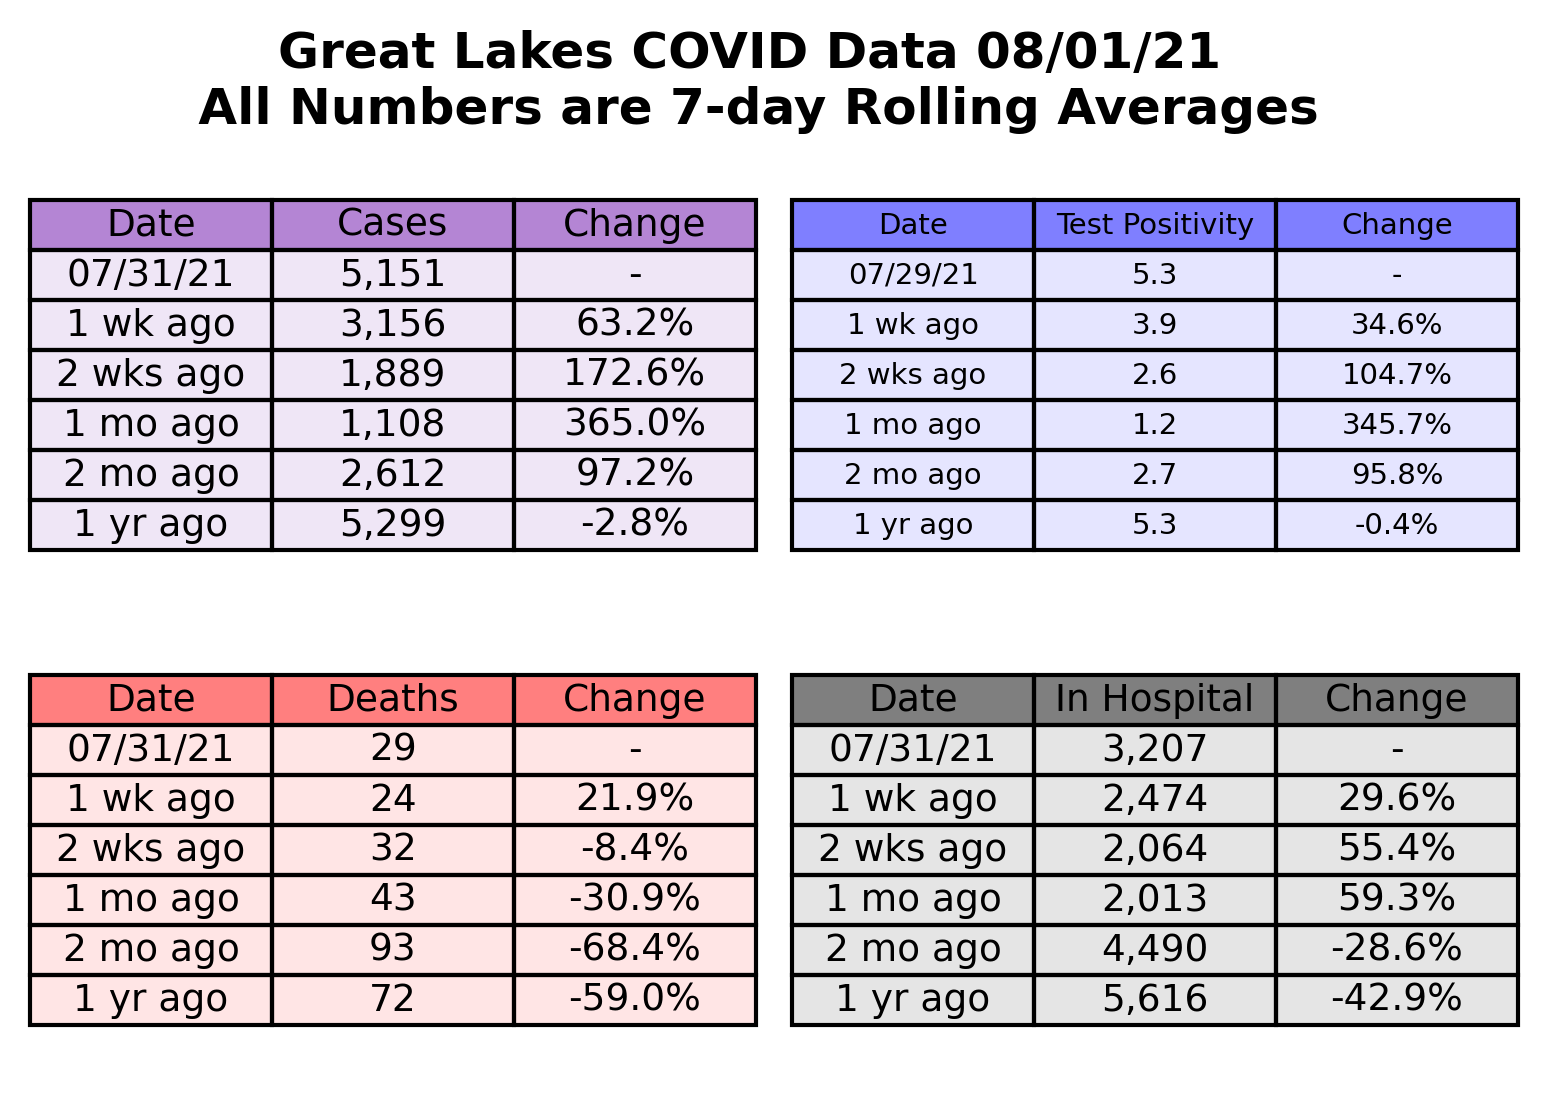

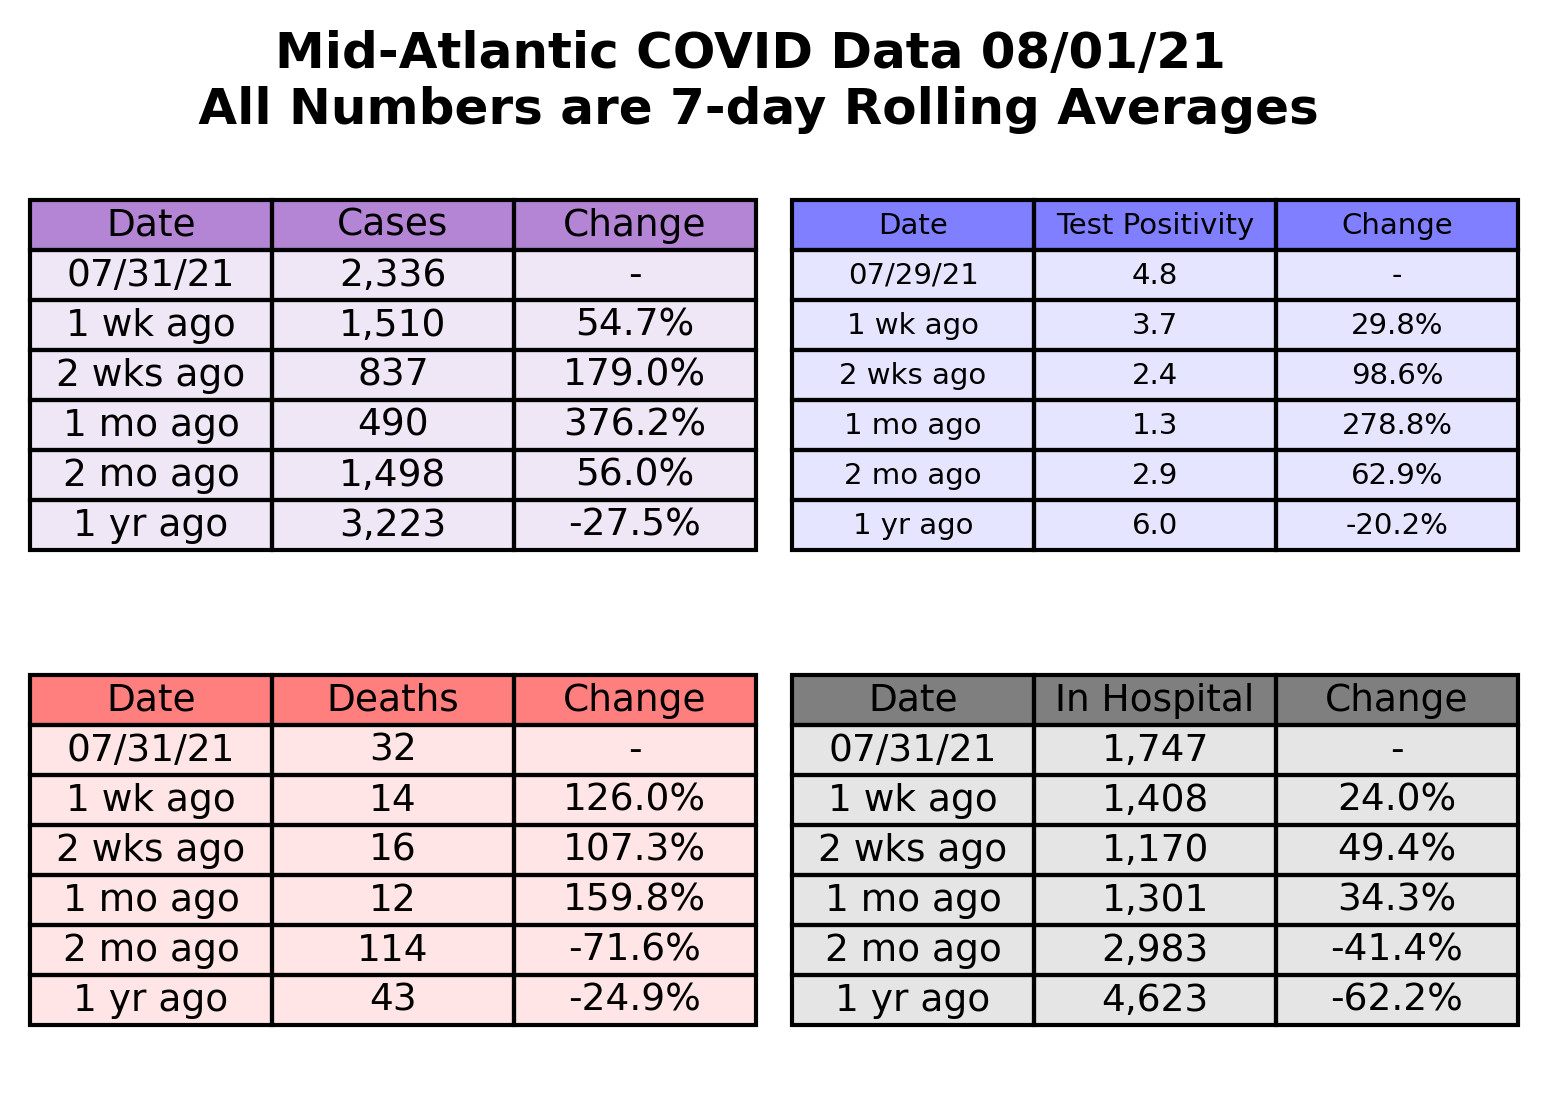

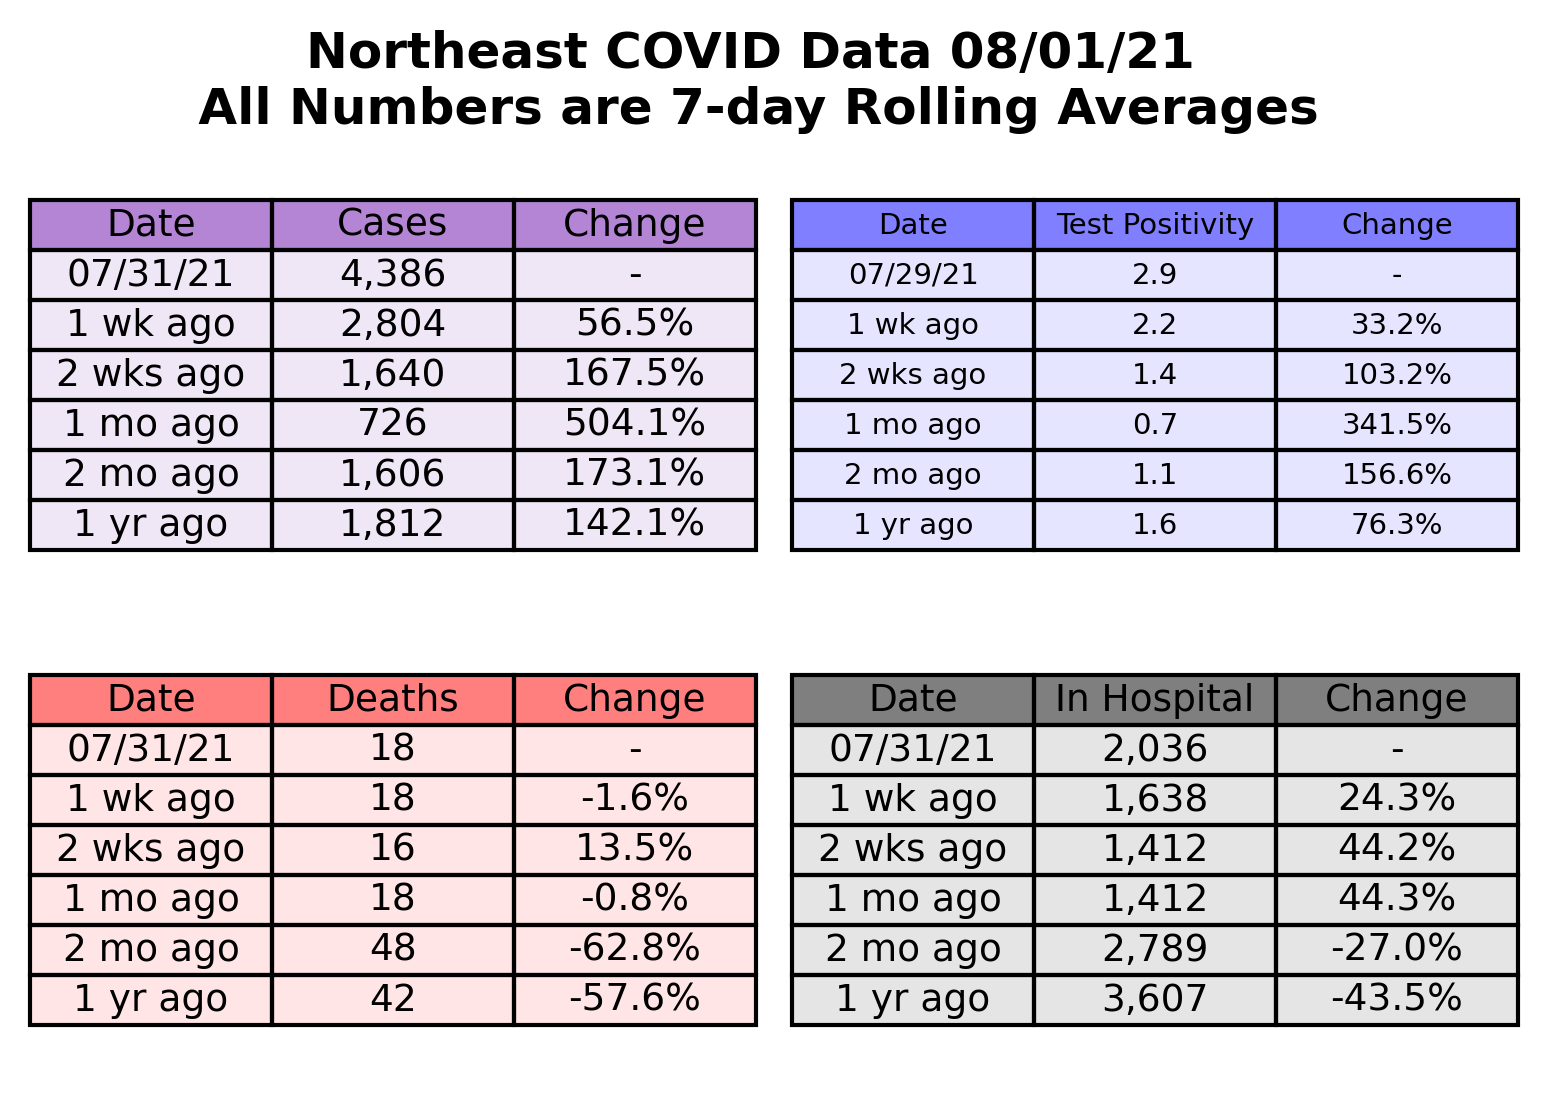

In [18]:
import math